# Project Group - 4

## Members and student numbers:
Hsuan-An Chu: 5914647\
Jarrik Overbosch: 6105734\
Mats Poppe: 5883245\
Cian Rippen: 5054141\
Sam Terstappen: 6078720


 

# Research Objective
## What is the influence of the weather on travel behaviour in The Netherlands?
* What is the correlation between amount of percipitation and amount of transport passengers, based on OV chipcard checkins? 
* What is the effect of weather on road traffic?
    * What is the effect of wind
    * What is the effect of rain
* What is the correlation between the weather and congestion?
* Is there a difference in behaviour between cities and rural areas?
* Where do the tipping points of behaviour lie? (e.g.amount of rain that starts people to change their behaviour)




*Requires data modeling and quantitative research in Transport, Infrastructure & Logistics*

In [1]:
import pandas as pd
file = "Literature and Data/Congestion_data_2022/jan.xlsx"
df_congestion_jan = pd.read_excel(file)
df_congestion_jan.head()


,NLSitNummer,DatumFileBegin,DatumFileEind,TijdFileBegin,TijdFileEind,FileZwaarte,GemLengte,FileDuur,HectometerKop,HectometerStaart,...,TrajVan,TrajNaar,OorzaakGronddetail,OorzaakVerloop,OorzaakCodeVerloop,OorzaakCode,Oorzaak_1,Oorzaak_2,Oorzaak_3,Oorzaak_4
0,3346718,2023-01-11,2023-01-11,17:22:32,17:44:04,"58,340","2709,000","21,533","116,5","114,5",...,Utrecht,'s-Hertogenbosch,Defect(e) voertuig(en),"[Geen oorzaakcode opgegeven door VWM 2], [Defe...","[000], [BKD]",BKD,Defect(e) voertuig(en),Defect voertuig,Incident (gestrand voertuig),Incident
1,3346719,2023-01-11,2023-01-11,17:22:32,17:43:00,"74,363","3633,000","20,467","0,0","3,7",...,Amersfoort,Utrecht,Spitsfile (geen oorzaak gemeld),[Geen oorzaakcode opgegeven door VWM 20],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit
2,3346720,2023-01-11,2023-01-11,17:22:32,17:59:00,"213,030","5842,000","36,467","70,0","66,6",...,Muiden,Lelystad,Spitsfile (geen oorzaak gemeld),[Geen oorzaakcode opgegeven door VWM 36],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit
3,3346721,2023-01-11,2023-01-11,17:22:32,17:30:04,"20,768","2757,000","7,533","9,8","12,2",...,Aken,Geleen,Spitsfile (geen oorzaak gemeld),[Geen oorzaakcode opgegeven door VWM 8],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit
4,3346722,2023-01-11,2023-01-11,17:22:32,17:24:00,"3,080","2100,000","1,467","223,2","225,3",...,Enschede,Varsseveld,Spitsfile (geen oorzaak gemeld),[Geen oorzaakcode opgegeven door VWM 1],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit


,Datum,Temperatuur (C),Neerslag (mm),Wind (km/h),Wegnummer,Vertraging (min),Aantal Files
0,2023-10-01 00:00:00,22.0,2.0,15.0,NaN,NaN,NaN
0,2023-10-01 10:54:00,NaN,NaN,NaN,A1,10.0,3.0
1,2023-10-01 15:23:00,NaN,NaN,NaN,A1,5.0,2.0
1,2023-10-02 00:00:00,23.0,0.0,12.0,NaN,NaN,NaN
2,2023-10-02 11:42:00,NaN,NaN,NaN,A2,20.0,1.0
3,2023-10-02 16:15:00,NaN,NaN,NaN,A2,15.0,3.0
2,2023-10-03 00:00:00,21.0,5.0,18.0,NaN,NaN,NaN
4,2023-10-03 12:56:00,NaN,NaN,NaN,A3,8.0,5.0
5,2023-10-03 17:30:00,NaN,NaN,NaN,A3,12.0,2.0
3,2023-10-04 00:00:00,20.0,8.0,10.0,NaN,NaN,NaN


C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_1948\2975424953.py:43: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_df.corr()


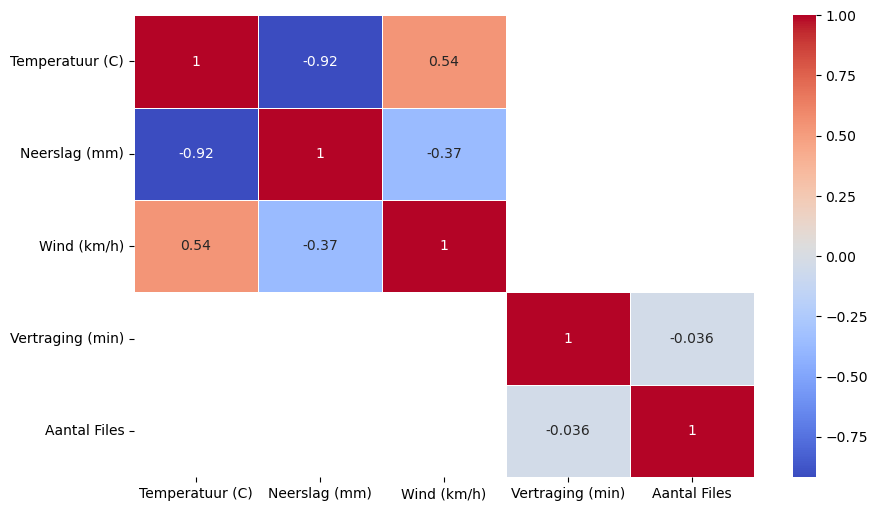

In [36]:
import pandas as pd 

data1 = {
    'Datum': ['2023-10-01', '2023-10-02', '2023-10-03', '2023-10-04', '2023-10-05'],
    'Temperatuur (C)': [22, 23, 21, 20, 24],
    'Neerslag (mm)': [2, 0, 5, 8, 1],
    'Wind (km/h)': [15, 12, 18, 10, 20]
}

df1 = pd.DataFrame(data1)

import pandas as pd

data2 = {
    'Datum': [
        '2023-10-01, 10:54',
        '2023-10-01, 15:23',
        '2023-10-02, 11:42',
        '2023-10-02, 16:15',
        '2023-10-03, 12:56',
        '2023-10-03, 17:30',
        '2023-10-04, 14:20',
        '2023-10-04, 18:10',
        '2023-10-05, 15:35',
        '2023-10-05, 19:45'
    ],
    'Wegnummer': ['A1', 'A1', 'A2', 'A2', 'A3', 'A3', 'A1', 'A1', 'A2', 'A2'],
    'Vertraging (min)': [10, 5, 20, 15, 8, 12, 17, 8, 22, 7],
    'Aantal Files': [3, 2, 1, 3, 5, 2, 2, 1, 4, 3]
}

df2 = pd.DataFrame(data2)
df1['Datum'] = pd.to_datetime(df1['Datum'])
df2['Datum'] = pd.to_datetime(df2['Datum'], format='%Y-%m-%d, %H:%M')

merged_df = pd.concat([df1, df2], sort=False)
merged_df = merged_df.sort_values(by='Datum')



# Deze code zal de DataFrame op een nette manier weergeven in een Jupyter Notebook-cel
from IPython.display import display
display(merged_df)
correlation_matrix = merged_df.corr()


In [47]:
import pandas as pd 

data1 = {
    'Datum': ['2023-10-01', '2023-10-02', '2023-10-03', '2023-10-04', '2023-10-05'],
    'Temperatuur (C)': [22, 23, 21, 20, 24],
    'Neerslag (mm)': [2, 0, 5, 8, 1],
    'Wind (km/h)': [15, 12, 18, 10, 20]
}

df1 = pd.DataFrame(data1)

import pandas as pd

data2 = {
    'Datum': [
        '2023-10-01, 10:54',
        '2023-10-01, 15:23',
        '2023-10-02, 11:42',
        '2023-10-02, 16:15',
        '2023-10-03, 12:56',
        '2023-10-03, 17:30',
        '2023-10-04, 14:20',
        '2023-10-04, 18:10',
        '2023-10-05, 15:35',
        '2023-10-05, 19:45'
    ],
    'Wegnummer': ['A1', 'A1', 'A2', 'A2', 'A3', 'A3', 'A1', 'A1', 'A2', 'A2'],
    'Vertraging (min)': [10, 5, 20, 15, 8, 12, 17, 8, 22, 7],
    'Aantal Files': [3, 2, 1, 3, 5, 2, 2, 1, 4, 3]
}

df2 = pd.DataFrame(data2)
df1['Datum'] = pd.to_datetime(df1['Datum'])
df2['Datum'] = pd.to_datetime(df2['Datum'], format='%Y-%m-%d, %H:%M')

merged_df = pd.concat([df1, df2], sort=False)
merged_df = merged_df.sort_values(by='Datum')



# Deze code zal de DataFrame op een nette manier weergeven in een Jupyter Notebook-cel
from IPython.display import display
display(merged_df)

,Datum,Temperatuur (C),Neerslag (mm),Wind (km/h),Wegnummer,Vertraging (min),Aantal Files
0,2023-10-01 00:00:00,22.0,2.0,15.0,NaN,NaN,NaN
0,2023-10-01 10:54:00,NaN,NaN,NaN,A1,10.0,3.0
1,2023-10-01 15:23:00,NaN,NaN,NaN,A1,5.0,2.0
1,2023-10-02 00:00:00,23.0,0.0,12.0,NaN,NaN,NaN
2,2023-10-02 11:42:00,NaN,NaN,NaN,A2,20.0,1.0
3,2023-10-02 16:15:00,NaN,NaN,NaN,A2,15.0,3.0
2,2023-10-03 00:00:00,21.0,5.0,18.0,NaN,NaN,NaN
4,2023-10-03 12:56:00,NaN,NaN,NaN,A3,8.0,5.0
5,2023-10-03 17:30:00,NaN,NaN,NaN,A3,12.0,2.0
3,2023-10-04 00:00:00,20.0,8.0,10.0,NaN,NaN,NaN


# Contribution Statement

*Be specific. Some of the tasks can be coding (expect everyone to do this), background research, conceptualisation, visualisation, data analysis, data modelling*

**Author 1**:

**Author 2**:

**Author 3**:

# Data Used

OV Chipcard checkins \
https://www.translink.nl/library \
Weather data \
https://dataplatform.knmi.nl/group/precipitation \
Congestion data \
https://downloads.rijkswaterstaatdata.nl/filedata/


# Data Pipeline